### Import the necessary libraries and read the dataset

In [1]:
from keras.datasets import mnist

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#set figsize to 3,3
plt.rcParams['figure.figsize'] = (3,3)

#tensorflow libraries
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

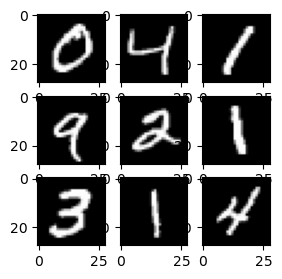

In [4]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i], cmap='gray')

In [5]:
X_train[1].shape

(28, 28)

### Preprocess the data

In [6]:
len(X_test)

10000

In [7]:
pd.Series(y_test).unique()

# we can observe that labels are literally a category of numbers,
# so we need to convert it as one hot encoded

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8], dtype=uint8)

In [8]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

y_cat_test[1]
# now out labels are successfully encoded

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
image_1 = X_train[1]
print(f'Maximum pixel intensity : {image_1.max()}')
print(f'Minimum pixel intensity : {image_1.min()}')

Maximum pixel intensity : 255
Minimum pixel intensity : 0


In [10]:
# Normalizing the data

X_train = X_train/255
X_test = X_test/255

In [11]:
print(f'X_train : {X_train.shape}')
print(f'X_train : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (60000, 28, 28)
X_train : (10000, 28, 28)
y_train : (60000,)
y_test : (10000,)


### Creating CNN Model architecture

In [12]:
28*28

784

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons as we have 10 classes
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 32)       │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,914 (327.79 KB)

 Trainable params: 83,914 (327.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

### Training

In [16]:
history = model.fit(X_train, y_cat_train, epochs = 10, validation_data=(X_test, y_cat_test), callbacks=early_stopping)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.8945 - loss: 0.3450 - val_accuracy: 0.9853 - val_loss: 0.0472
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9831 - loss: 0.0524 - val_accuracy: 0.9890 - val_loss: 0.0360
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9922 - loss: 0.0243 - val_accuracy: 0.9876 - val_loss: 0.0367


In [17]:
losses = pd.DataFrame(model.history.history)

In [18]:
losses

,accuracy,loss,val_accuracy,val_loss
0,0.952717,0.154689,0.9853,0.047243
1,0.983800,0.051290,0.9890,0.035951
2,0.989283,0.035404,0.9892,0.036398
3,0.991500,0.026771,0.9876,0.036725


<Axes: >

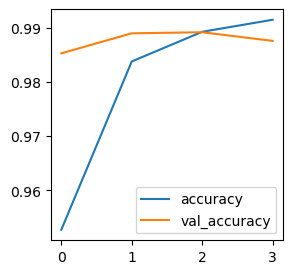

In [19]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

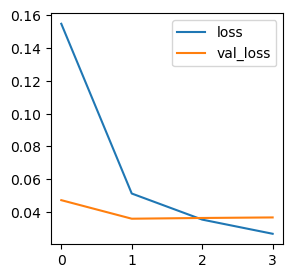

In [20]:
losses[['loss', 'val_loss']].plot()

In [21]:
preds = model.evaluate(X_test, y_cat_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9836 - loss: 0.0473


[0.0367252491414547, 0.9876000285148621]

In [22]:
predictions = np.argmax(model.predict(X_test), axis = 1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [24]:
print(accuracy_score(y_test, predictions))

0.9876


In [25]:
print(confusion_matrix(y_test, predictions))

[[ 976    0    0    0    0    0    1    1    2    0]
 [   3 1121    2    0    0    1    4    3    0    1]
 [   0    1 1023    1    0    0    1    6    0    0]
 [   0    0    1 1003    0    4    0    2    0    0]
 [   0    0    3    0  957    0    3    1    0   18]
 [   0    0    0    3    0  887    1    1    0    0]
 [   4    1    0    0    1    3  949    0    0    0]
 [   0    1    2    2    0    0    0 1023    0    0]
 [   3    0    2    8    0    6    0    0  951    4]
 [   1    2    0    1    0   12    1    5    1  986]]


In [26]:
# Save the model
model.save('handwriting_model.h5')

### Predict on a random image

In [27]:
import random
from tensorflow.keras.models import load_model

model = load_model('D:\\nettech\\deeplearning\\Models\\handwriting_model.h5')

Image Selected : 2411


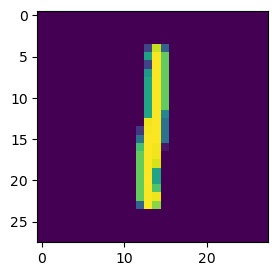

Predicted number : 1


In [29]:
random_ind = random.randint(0, len(X_test))
print(f'Image Selected : {random_ind}')
img = X_test[random_ind]
plt.imshow(img)
plt.show()

img.shape

ans = model.predict(img.reshape(1, 28, 28), verbose=0)
print(f'Predicted number : {np.argmax(ans)}')